In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split as TTS
from sklearn.linear_model import LinearRegression as LR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR, GradientBoostingRegressor as GBR, AdaBoostRegressor as ABR
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.svm import SVR
from sklearn.metrics import r2_score as R2
from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('advertising.csv')

In [4]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


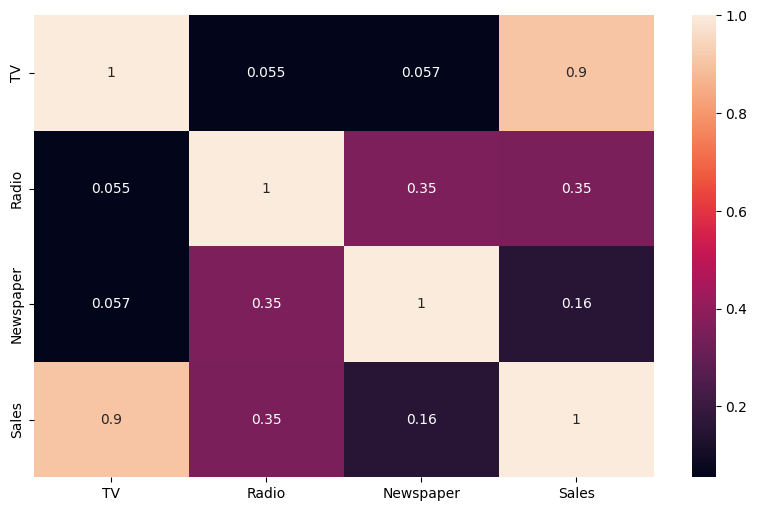

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [10]:
X = data.drop(columns=['Sales'], axis=1)
y = data['Sales']

In [11]:
X.shape, y.shape

((200, 3), (200,))

In [12]:
X_train, X_test, y_train, y_test = TTS(X, y, test_size=0.25, random_state=2)

In [13]:
X.shape, X_train.shape, X_test.shape

((200, 3), (150, 3), (50, 3))

In [21]:
models = [LR(), DTR(), RFR(), GBR(), ABR(), KNR(), SVR()]

In [33]:
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model.__class__.__name__, "\n\t: R2 Score: ", R2(y_test, y_pred), "\tMSE Score: ", MSE(y_test, y_pred), "\n")

LinearRegression 
	: R2 Score:  0.834620388594502 	MSE Score:  3.8644690399296824 

DecisionTreeRegressor 
	: R2 Score:  0.8755609557028157 	MSE Score:  2.9078000000000004 

RandomForestRegressor 
	: R2 Score:  0.929696047427718 	MSE Score:  1.6428110199999915 

GradientBoostingRegressor 
	: R2 Score:  0.9233939171781411 	MSE Score:  1.790074561304242 

AdaBoostRegressor 
	: R2 Score:  0.9096673445133518 	MSE Score:  2.110827008577556 

KNeighborsRegressor 
	: R2 Score:  0.8451300075182101 	MSE Score:  3.618888 

SVR 
	: R2 Score:  0.8461804442526761 	MSE Score:  3.5943421675104354 



In [37]:
from sklearn.preprocessing import StandardScaler as SC

In [38]:
sc = SC()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [41]:
for model in models:
    model.fit(X_train_sc, y_train)
    y_pred = model.predict(X_test_sc)
    print(model.__class__.__name__, "\n\t: R2 Score: ", R2(y_test, y_pred), "\tMSE Score: ", MSE(y_test, y_pred), "\n")

LinearRegression 
	: R2 Score:  0.8346203885945019 	MSE Score:  3.864469039929684 

DecisionTreeRegressor 
	: R2 Score:  0.8977287199733781 	MSE Score:  2.3898000000000006 

RandomForestRegressor 
	: R2 Score:  0.9296618782584049 	MSE Score:  1.6436094599999942 

GradientBoostingRegressor 
	: R2 Score:  0.9229652936328345 	MSE Score:  1.8000903208440362 

AdaBoostRegressor 
	: R2 Score:  0.9128635745732974 	MSE Score:  2.0361398569620746 

KNeighborsRegressor 
	: R2 Score:  0.8193921205323824 	MSE Score:  4.220312 

SVR 
	: R2 Score:  0.7587436168074162 	MSE Score:  5.637501597746268 



In [42]:
data1 = pd.DataFrame({'Tested Data': y_test, 'Predicted data': y_pred})

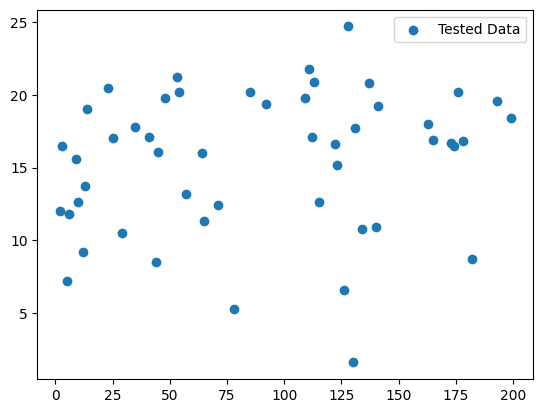

In [55]:
plt.scatter(data1.index, data1['Tested Data'], label='Tested Data')
plt.legend()
plt.show()